<a href="https://colab.research.google.com/github/antonypaulson/Digit-recognition/blob/master/Digit_Recognizer_Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import keras
from keras.utils import np_utils
import tensorflow as tf

In [23]:
#Reading in the dataset
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Splitting the data into traget and predictors
X = data.drop(columns = 'label')
y = data['label']

In [0]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [0]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

In [0]:
#reshaping the whole thing to images of shape 28,28,1
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
# Change y_train.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#creating a sequential neural network model of Dense layers

model = Sequential()
model.add(Dense(128,
                input_shape = (28,28,1),
               activation = 'relu'))
model.add(Dense(64,
               activation = 'relu'))
model.add(Dense(32,
               activation = 'relu'))
model.add(Flatten())
model.add(Dense(10,
               activation = 'softmax'))

In [0]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 7s 225us/step - loss: 0.5306 - acc: 0.8576 - val_loss: 0.3154 - val_acc: 0.9074
Epoch 2/5
31500/31500 [==============================] - 7s 208us/step - loss: 0.2872 - acc: 0.9178 - val_loss: 0.2831 - val_acc: 0.9206
Epoch 3/5
31500/31500 [==============================] - 7s 207us/step - loss: 0.2713 - acc: 0.9241 - val_loss: 0.2991 - val_acc: 0.9126
Epoch 4/5
31500/31500 [==============================] - 7s 207us/step - loss: 0.2655 - acc: 0.9247 - val_loss: 0.3098 - val_acc: 0.9082
Epoch 5/5
31500/31500 [==============================] - 7s 207us/step - loss: 0.2550 - acc: 0.9274 - val_loss: 0.3072 - val_acc: 0.9092


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 28, 128)       256       
_________________________________________________________________
dense_6 (Dense)              (None, 28, 28, 64)        8256      
_________________________________________________________________
dense_7 (Dense)              (None, 28, 28, 32)        2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                250890    
Total params: 261,482
Trainable params: 261,482
Non-trainable params: 0
_________________________________________________________________


In [34]:
#With convolutional layers
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

W0820 09:02:00.316179 140454808795008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 09:02:00.329526 140454808795008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 9s 282us/step - loss: 0.4270 - acc: 0.8578 - val_loss: 0.0870 - val_acc: 0.9721
Epoch 2/5
31500/31500 [==============================] - 5s 169us/step - loss: 0.1075 - acc: 0.9673 - val_loss: 0.0576 - val_acc: 0.9829
Epoch 3/5
31500/31500 [==============================] - 5s 169us/step - loss: 0.0799 - acc: 0.9750 - val_loss: 0.0462 - val_acc: 0.9862
Epoch 4/5
31500/31500 [==============================] - 5s 170us/step - loss: 0.0682 - acc: 0.9785 - val_loss: 0.0342 - val_acc: 0.9890
Epoch 5/5
31500/31500 [==============================] - 5s 169us/step - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0357 - val_acc: 0.9894


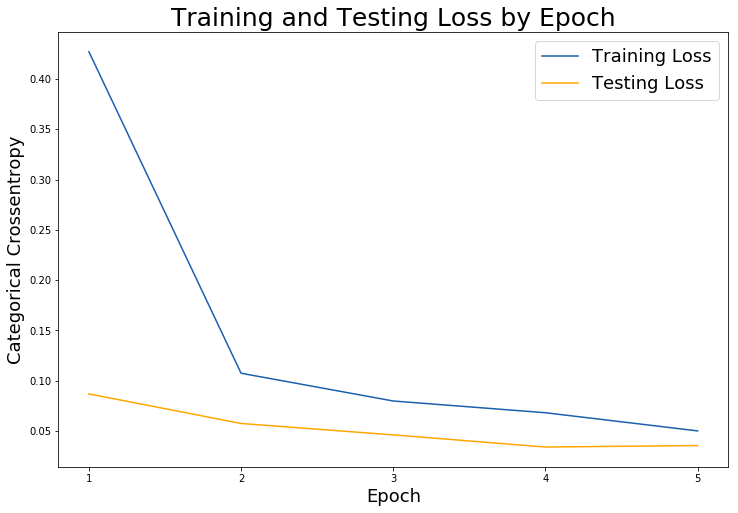

In [37]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);